# Load Libraries

In [ ]:
import numpy as np

from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from tensorflow.keras.layers import (BatchNormalization)
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator, array_to_img
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils.np_utils import to_categorical
from keras.constraints import maxnorm
from IPython.display import SVG
from keras.regularizers import l2, l1, l1_l2
from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

np.random.seed(1234)

# Load dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)

(60000, 28, 28)


In [ ]:
# reshaping x_train and x_test
x_train_cnn = x_train.reshape(x_train.shape[0], 28, 28,1)
x_test_cnn = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train_cnn.shape)
print(x_test_cnn.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
y_train_cnn = to_categorical(y_train)
y_test_cnn = to_categorical(y_test)

In [ ]:
print(y_train_cnn.shape)
print(y_test_cnn.shape)


(60000, 10)
(10000, 10)


## Data Normalization

In [ ]:
# normalize train and test to [0, 1]
x_train_norm, x_test_norm = x_train_cnn/255.0, x_test_cnn/255.0;

# CNN with softmax

## Baseline

In [ ]:
# Model
cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn1.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn1.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn1.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn1.add(Flatten())
cnn1.add(Dense(1024, activation='relu'))

cnn1.add(Dropout(rate=0.5))

cnn1.add(Dense(10, activation='softmax'))

In [ ]:
opt = Adam(lr= 1e-3, beta_1=0.9, beta_2=0.999)

In [ ]:
cnn1.compile(optimizer=opt, loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
cnn1.summary()
# model shape
# tf.keras.utils.plot_model(cnn1, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 19, 19, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 20736)             0         
                                                                 
 dense (Dense)               (None, 1024)              2

In [ ]:
history = cnn1.fit(x_train_norm, y_train_cnn,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_norm, y_test_cnn))

Epoch 1/25
469/469 [==============================] - 17s 15ms/step - loss: 0.3518 - accuracy: 0.9498 - val_loss: 0.0528 - val_accuracy: 0.9813
Epoch 2/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0549 - accuracy: 0.9833 - val_loss: 0.0351 - val_accuracy: 0.9885
Epoch 3/25
469/469 [==============================] - 7s 16ms/step - loss: 0.0388 - accuracy: 0.9881 - val_loss: 0.0461 - val_accuracy: 0.9868
Epoch 4/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0302 - accuracy: 0.9905 - val_loss: 0.0365 - val_accuracy: 0.9888
Epoch 5/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0249 - accuracy: 0.9921 - val_loss: 0.0378 - val_accuracy: 0.9895
Epoch 6/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0209 - accuracy: 0.9934 - val_loss: 0.0390 - val_accuracy: 0.9900
Epoch 7/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0197 - accuracy: 0.9936 - val_loss: 0.0424 - val_accuracy: 0.988

In [ ]:
score = cnn1.evaluate(x_test_norm, y_test_cnn, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06549195200204849
Test accuracy: 0.9901999831199646


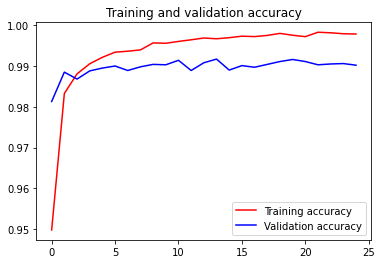

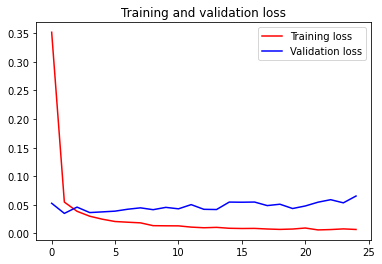

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


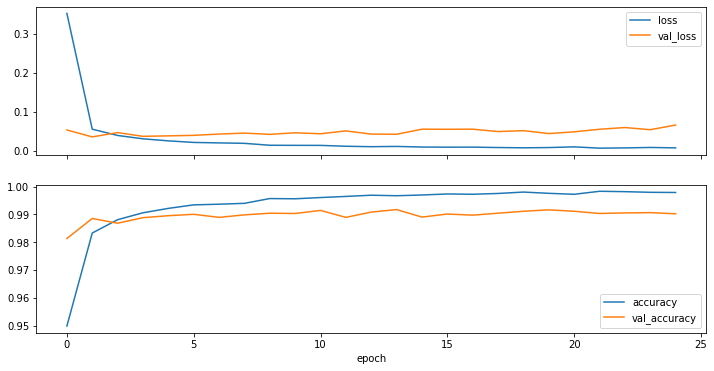

In [ ]:
history_df = pd.DataFrame(history.history)
history_df["epoch"] = history.epoch
fig, (ax0,ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df.plot(x="epoch", y =["loss", "val_loss"], ax=ax0)
history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax= ax1);


# CNN with SVM

## Baseline

In [ ]:
# SVM C parameter (penalty parameter)
svm_c = 1

# Layer regularizer
l2 = tf.keras.regularizers.L2(l2=svm_c)

In [ ]:
# Model
cnn2 = Sequential()
cnn2.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn2.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn2.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn2.add(Flatten())
cnn2.add(Dense(1024, activation='relu'))

cnn2.add(Dropout(rate=0.5))

cnn2.add(Dense(10, kernel_regularizer=l2))   # No activation function; instead use L2 regularization

In [ ]:
opt = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999)

In [ ]:
# SVM is L2 regularized hinge loss
cnn2.compile(optimizer=opt, loss = tf.keras.losses.Hinge(), metrics=['accuracy'])

In [ ]:
cnn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 19, 19, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 20736)             0         
                                                                 
 dense_2 (Dense)             (None, 1024)             

In [ ]:
history = cnn2.fit(x_train_norm, y_train_cnn,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_norm, y_test_cnn))

Epoch 1/25
469/469 [==============================] - 9s 16ms/step - loss: 1.0150 - accuracy: 0.9372 - val_loss: 0.0358 - val_accuracy: 0.9759
Epoch 2/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0362 - accuracy: 0.9756 - val_loss: 0.0325 - val_accuracy: 0.9834
Epoch 3/25
469/469 [==============================] - 7s 16ms/step - loss: 0.0343 - accuracy: 0.9802 - val_loss: 0.0281 - val_accuracy: 0.9853
Epoch 4/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0331 - accuracy: 0.9831 - val_loss: 0.0277 - val_accuracy: 0.9870
Epoch 5/25
469/469 [==============================] - 7s 16ms/step - loss: 0.0323 - accuracy: 0.9861 - val_loss: 0.0287 - val_accuracy: 0.9891
Epoch 6/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0310 - accuracy: 0.9870 - val_loss: 0.0253 - val_accuracy: 0.9901
Epoch 7/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0295 - accuracy: 0.9884 - val_loss: 0.0286 - val_accuracy: 0.9902

In [ ]:
score = cnn2.evaluate(x_test_norm, y_test_cnn, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.030954595655202866
Test accuracy: 0.9923999905586243


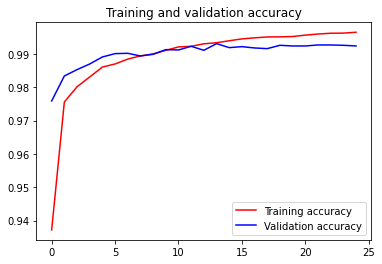

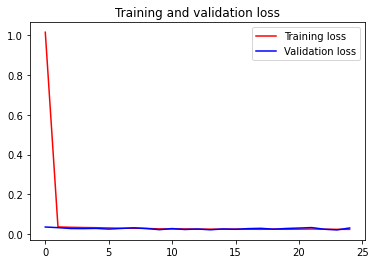

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


## Tune dropout rate

### 0.4

In [ ]:
# Model
cnn2 = Sequential()
cnn2.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn2.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn2.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn2.add(Flatten())
cnn2.add(Dense(1024, activation='relu'))

cnn2.add(Dropout(rate=0.4))

cnn2.add(Dense(10, kernel_regularizer=l2))   # No activation function; instead use L2 regularization

In [ ]:
opt = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999)

In [ ]:
# SVM is L2 regularized hinge loss
cnn2.compile(optimizer=opt, loss = tf.keras.losses.Hinge(), metrics=['accuracy'])

In [ ]:
cnn2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 19, 19, 64)        51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 20736)             0         
                                                                 
 dense_4 (Dense)             (None, 1024)             

In [ ]:
history = cnn2.fit(x_train_norm, y_train_cnn,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_norm, y_test_cnn))

Epoch 1/25
469/469 [==============================] - 8s 16ms/step - loss: 1.0394 - accuracy: 0.9244 - val_loss: 0.0319 - val_accuracy: 0.9790
Epoch 2/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0344 - accuracy: 0.9740 - val_loss: 0.0311 - val_accuracy: 0.9826
Epoch 3/25
469/469 [==============================] - 7s 16ms/step - loss: 0.0331 - accuracy: 0.9796 - val_loss: 0.0281 - val_accuracy: 0.9843
Epoch 4/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0310 - accuracy: 0.9821 - val_loss: 0.0246 - val_accuracy: 0.9866
Epoch 5/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0294 - accuracy: 0.9840 - val_loss: 0.0245 - val_accuracy: 0.9872
Epoch 6/25
469/469 [==============================] - 7s 16ms/step - loss: 0.0280 - accuracy: 0.9855 - val_loss: 0.0233 - val_accuracy: 0.9888
Epoch 7/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0261 - accuracy: 0.9873 - val_loss: 0.0249 - val_accuracy: 0.9875

In [ ]:
score = cnn2.evaluate(x_test_norm, y_test_cnn, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.01864912360906601
Test accuracy: 0.9926000237464905


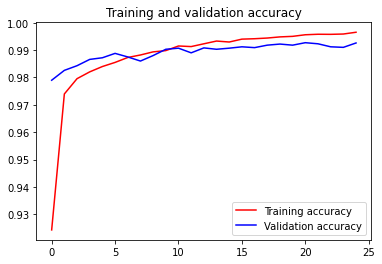

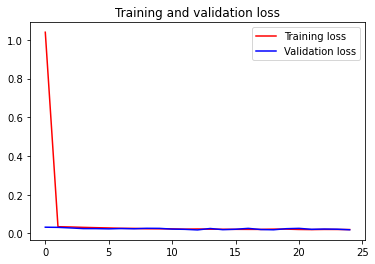

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


### 0.6

In [ ]:
# Model
cnn2 = Sequential()
cnn2.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn2.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn2.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn2.add(Flatten())
cnn2.add(Dense(1024, activation='relu'))

cnn2.add(Dropout(rate=0.6))

cnn2.add(Dense(10, kernel_regularizer=l2))   # No activation function; instead use L2 regularization

In [ ]:
opt = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999)

In [ ]:
# SVM is L2 regularized hinge loss
cnn2.compile(optimizer=opt, loss = tf.keras.losses.Hinge(), metrics=['accuracy'])

In [ ]:
cnn2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 19, 19, 64)        51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 20736)             0         
                                                                 
 dense_6 (Dense)             (None, 1024)             

In [ ]:
history = cnn2.fit(x_train_norm, y_train_cnn,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_norm, y_test_cnn))

Epoch 1/25
469/469 [==============================] - 8s 15ms/step - loss: 1.0382 - accuracy: 0.9277 - val_loss: 0.0378 - val_accuracy: 0.9783
Epoch 2/25
469/469 [==============================] - 7s 16ms/step - loss: 0.0436 - accuracy: 0.9718 - val_loss: 0.0351 - val_accuracy: 0.9815
Epoch 3/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0412 - accuracy: 0.9772 - val_loss: 0.0382 - val_accuracy: 0.9840
Epoch 4/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0390 - accuracy: 0.9816 - val_loss: 0.0311 - val_accuracy: 0.9884
Epoch 5/25
469/469 [==============================] - 7s 16ms/step - loss: 0.0384 - accuracy: 0.9839 - val_loss: 0.0330 - val_accuracy: 0.9868
Epoch 6/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0362 - accuracy: 0.9860 - val_loss: 0.0304 - val_accuracy: 0.9881
Epoch 7/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0355 - accuracy: 0.9865 - val_loss: 0.0303 - val_accuracy: 0.9909

In [ ]:
score = cnn2.evaluate(x_test_norm, y_test_cnn, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03360816091299057
Test accuracy: 0.9926000237464905


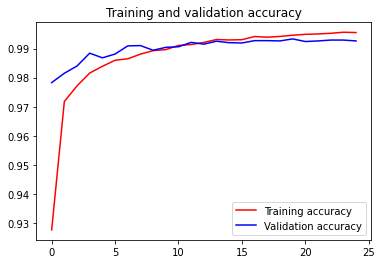

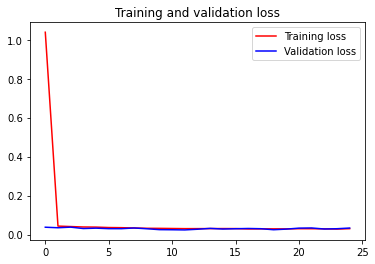

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


### 0.7

In [ ]:
# Model
cnn2 = Sequential()
cnn2.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn2.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn2.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn2.add(Flatten())
cnn2.add(Dense(1024, activation='relu'))

cnn2.add(Dropout(rate=0.7))

cnn2.add(Dense(10, kernel_regularizer=l2))   # No activation function; instead use L2 regularization

In [ ]:
opt = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999)

In [ ]:
# SVM is L2 regularized hinge loss
cnn2.compile(optimizer=opt, loss = tf.keras.losses.Hinge(), metrics=['accuracy'])

In [ ]:
cnn2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 19, 19, 64)        51264     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 20736)             0         
                                                                 
 dense_8 (Dense)             (None, 1024)             

In [ ]:
history = cnn2.fit(x_train_norm, y_train_cnn,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_norm, y_test_cnn))

Epoch 1/25
469/469 [==============================] - 8s 16ms/step - loss: 1.0372 - accuracy: 0.9250 - val_loss: 0.0388 - val_accuracy: 0.9760
Epoch 2/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0491 - accuracy: 0.9702 - val_loss: 0.0379 - val_accuracy: 0.9833
Epoch 3/25
469/469 [==============================] - 7s 16ms/step - loss: 0.0460 - accuracy: 0.9772 - val_loss: 0.0356 - val_accuracy: 0.9852
Epoch 4/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0451 - accuracy: 0.9809 - val_loss: 0.0360 - val_accuracy: 0.9858
Epoch 5/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0433 - accuracy: 0.9827 - val_loss: 0.0378 - val_accuracy: 0.9877
Epoch 6/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0427 - accuracy: 0.9847 - val_loss: 0.0394 - val_accuracy: 0.9880
Epoch 7/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0415 - accuracy: 0.9863 - val_loss: 0.0388 - val_accuracy: 0.9884

In [ ]:
score = cnn2.evaluate(x_test_norm, y_test_cnn, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03673681616783142
Test accuracy: 0.9919999837875366


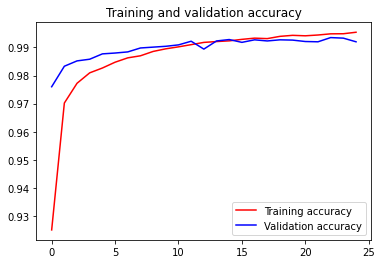

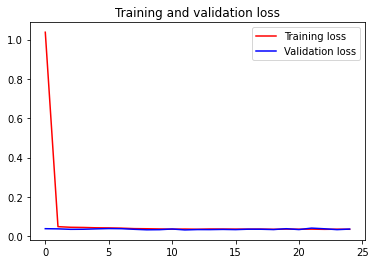

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


## Tune batch size

### 64

In [ ]:
# Model
cnn2 = Sequential()
cnn2.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn2.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn2.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn2.add(Flatten())
cnn2.add(Dense(1024, activation='relu'))

cnn2.add(Dropout(rate=0.5))

cnn2.add(Dense(10, kernel_regularizer=l2))   # No activation function; instead use L2 regularization

In [ ]:
opt = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999)

In [ ]:
# SVM is L2 regularized hinge loss
cnn2.compile(optimizer=opt, loss = tf.keras.losses.Hinge(), metrics=['accuracy'])

In [ ]:
history = cnn2.fit(x_train_norm, y_train_cnn,
                  batch_size=64,
                  epochs=25,
                  validation_data=(x_test_norm, y_test_cnn))

Epoch 1/25
938/938 [==============================] - 11s 11ms/step - loss: 0.5559 - accuracy: 0.9432 - val_loss: 0.0445 - val_accuracy: 0.9783
Epoch 2/25
938/938 [==============================] - 10s 11ms/step - loss: 0.0471 - accuracy: 0.9760 - val_loss: 0.0405 - val_accuracy: 0.9827
Epoch 3/25
938/938 [==============================] - 10s 11ms/step - loss: 0.0448 - accuracy: 0.9813 - val_loss: 0.0350 - val_accuracy: 0.9862
Epoch 4/25
938/938 [==============================] - 10s 11ms/step - loss: 0.0407 - accuracy: 0.9844 - val_loss: 0.0367 - val_accuracy: 0.9885
Epoch 5/25
938/938 [==============================] - 10s 11ms/step - loss: 0.0377 - accuracy: 0.9864 - val_loss: 0.0309 - val_accuracy: 0.9896
Epoch 6/25
938/938 [==============================] - 10s 11ms/step - loss: 0.0343 - accuracy: 0.9890 - val_loss: 0.0291 - val_accuracy: 0.9906
Epoch 7/25
938/938 [==============================] - 10s 11ms/step - loss: 0.0336 - accuracy: 0.9895 - val_loss: 0.0327 - val_accuracy:

In [ ]:
score = cnn2.evaluate(x_test_norm, y_test_cnn, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.023601511493325233
Test accuracy: 0.9933000206947327


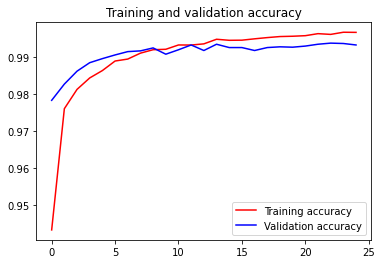

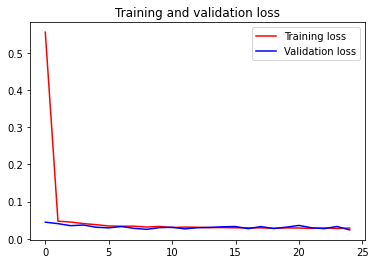

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


### 256

In [ ]:
# Model
cnn2 = Sequential()
cnn2.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn2.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn2.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn2.add(Flatten())
cnn2.add(Dense(1024, activation='relu'))

cnn2.add(Dropout(rate=0.5))

cnn2.add(Dense(10, kernel_regularizer=l2))   # No activation function; instead use L2 regularization

In [ ]:
opt = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999)

In [ ]:
# SVM is L2 regularized hinge loss
cnn2.compile(optimizer=opt, loss = tf.keras.losses.Hinge(), metrics=['accuracy'])

In [ ]:
history = cnn2.fit(x_train_norm, y_train_cnn,
                  batch_size=258,
                  epochs=25,
                  validation_data=(x_test_norm, y_test_cnn))

Epoch 1/25
233/233 [==============================] - 7s 26ms/step - loss: 2.0683 - accuracy: 0.9078 - val_loss: 0.0355 - val_accuracy: 0.9719
Epoch 2/25
233/233 [==============================] - 6s 24ms/step - loss: 0.0349 - accuracy: 0.9707 - val_loss: 0.0252 - val_accuracy: 0.9790
Epoch 3/25
233/233 [==============================] - 6s 24ms/step - loss: 0.0293 - accuracy: 0.9768 - val_loss: 0.0266 - val_accuracy: 0.9809
Epoch 4/25
233/233 [==============================] - 6s 24ms/step - loss: 0.0268 - accuracy: 0.9813 - val_loss: 0.0233 - val_accuracy: 0.9861
Epoch 5/25
233/233 [==============================] - 6s 24ms/step - loss: 0.0256 - accuracy: 0.9825 - val_loss: 0.0229 - val_accuracy: 0.9851
Epoch 6/25
233/233 [==============================] - 6s 24ms/step - loss: 0.0253 - accuracy: 0.9850 - val_loss: 0.0214 - val_accuracy: 0.9886
Epoch 7/25
233/233 [==============================] - 6s 24ms/step - loss: 0.0251 - accuracy: 0.9856 - val_loss: 0.0288 - val_accuracy: 0.9859

In [ ]:
score = cnn2.evaluate(x_test_norm, y_test_cnn, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.019926387816667557
Test accuracy: 0.991100013256073


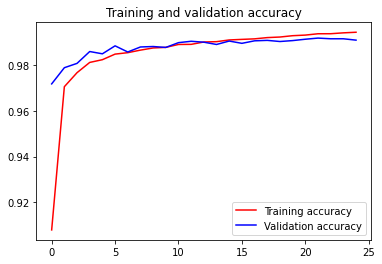

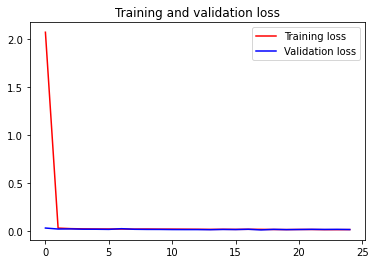

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


## Tune learning rate

### 2e-3

In [ ]:
# Model
cnn2 = Sequential()
cnn2.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn2.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn2.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn2.add(Flatten())
cnn2.add(Dense(1024, activation='relu'))

cnn2.add(Dropout(rate=0.5))

cnn2.add(Dense(10, kernel_regularizer=l2))   # No activation function; instead use L2 regularization

In [ ]:
opt = Adam(lr=2e-3, beta_1=0.9, beta_2=0.999)

In [ ]:
# SVM is L2 regularized hinge loss
cnn2.compile(optimizer=opt, loss = tf.keras.losses.Hinge(), metrics=['accuracy'])

In [ ]:
cnn2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 19, 19, 64)        51264     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 18, 18, 64)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 20736)             0         
                                                                 
 dense_14 (Dense)            (None, 1024)             

In [ ]:
history = cnn2.fit(x_train_norm, y_train_cnn,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_norm, y_test_cnn))

Epoch 1/25
469/469 [==============================] - 8s 16ms/step - loss: 0.6301 - accuracy: 0.9250 - val_loss: 0.0428 - val_accuracy: 0.9797
Epoch 2/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0573 - accuracy: 0.9732 - val_loss: 0.0452 - val_accuracy: 0.9841
Epoch 3/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0574 - accuracy: 0.9788 - val_loss: 0.0556 - val_accuracy: 0.9843
Epoch 4/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0544 - accuracy: 0.9812 - val_loss: 0.0433 - val_accuracy: 0.9860
Epoch 5/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0522 - accuracy: 0.9836 - val_loss: 0.0522 - val_accuracy: 0.9874
Epoch 6/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0501 - accuracy: 0.9855 - val_loss: 0.0408 - val_accuracy: 0.9883
Epoch 7/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0475 - accuracy: 0.9870 - val_loss: 0.0437 - val_accuracy: 0.9881

In [ ]:
score = cnn2.evaluate(x_test_norm, y_test_cnn, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.030359363183379173
Test accuracy: 0.9918000102043152


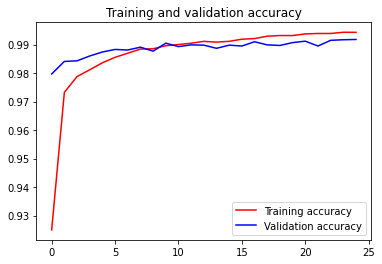

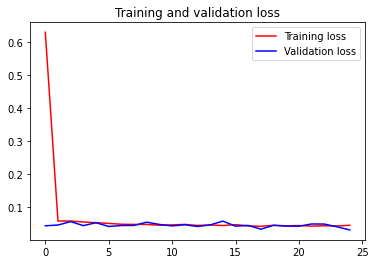

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


### 5e-3

In [ ]:
# Model
cnn2 = Sequential()
cnn2.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn2.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn2.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn2.add(Flatten())
cnn2.add(Dense(1024, activation='relu'))

cnn2.add(Dropout(rate=0.5))

cnn2.add(Dense(10, kernel_regularizer=l2))   # No activation function; instead use L2 regularization

In [ ]:
opt = Adam(lr=5e-3, beta_1=0.9, beta_2=0.999)

In [ ]:
# SVM is L2 regularized hinge loss
cnn2.compile(optimizer=opt, loss = tf.keras.losses.Hinge(), metrics=['accuracy'])

In [ ]:
cnn2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 19, 19, 64)        51264     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 18, 18, 64)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 20736)             0         
                                                                 
 dense_16 (Dense)            (None, 1024)             

In [ ]:
history = cnn2.fit(x_train_norm, y_train_cnn,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_norm, y_test_cnn))

Epoch 1/25
469/469 [==============================] - 8s 15ms/step - loss: 0.5073 - accuracy: 0.8831 - val_loss: 0.0810 - val_accuracy: 0.9694
Epoch 2/25
469/469 [==============================] - 7s 16ms/step - loss: 0.0959 - accuracy: 0.9599 - val_loss: 0.0769 - val_accuracy: 0.9782
Epoch 3/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0952 - accuracy: 0.9693 - val_loss: 0.0797 - val_accuracy: 0.9781
Epoch 4/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0907 - accuracy: 0.9745 - val_loss: 0.1132 - val_accuracy: 0.9823
Epoch 5/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0892 - accuracy: 0.9766 - val_loss: 0.0830 - val_accuracy: 0.9837
Epoch 6/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0898 - accuracy: 0.9780 - val_loss: 0.0911 - val_accuracy: 0.9816
Epoch 7/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0845 - accuracy: 0.9778 - val_loss: 0.0699 - val_accuracy: 0.9850

In [ ]:
score = cnn2.evaluate(x_test_norm, y_test_cnn, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08085817843675613
Test accuracy: 0.9894000291824341


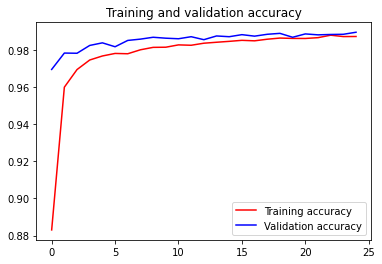

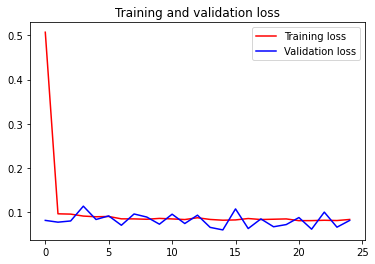

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


### 1e-2

In [ ]:
# Model
cnn2 = Sequential()
cnn2.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn2.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn2.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn2.add(Flatten())
cnn2.add(Dense(1024, activation='relu'))

cnn2.add(Dropout(rate=0.5))

cnn2.add(Dense(10, kernel_regularizer=l2))   # No activation function; instead use L2 regularization

In [ ]:
opt = Adam(lr=1e-2, beta_1=0.9, beta_2=0.999)

In [ ]:
# SVM is L2 regularized hinge loss
cnn2.compile(optimizer=opt, loss = tf.keras.losses.Hinge(), metrics=['accuracy'])

In [ ]:
cnn2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 19, 19, 64)        51264     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 18, 18, 64)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 20736)             0         
                                                                 
 dense_18 (Dense)            (None, 1024)             

In [ ]:
history = cnn2.fit(x_train_norm, y_train_cnn,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_norm, y_test_cnn))

Epoch 1/25
469/469 [==============================] - 8s 16ms/step - loss: 0.8989 - accuracy: 0.1016 - val_loss: 0.2036 - val_accuracy: 0.1135
Epoch 2/25
469/469 [==============================] - 7s 15ms/step - loss: 0.2036 - accuracy: 0.1006 - val_loss: 0.2031 - val_accuracy: 0.1009
Epoch 3/25
469/469 [==============================] - 7s 16ms/step - loss: 0.2016 - accuracy: 0.1001 - val_loss: 0.2011 - val_accuracy: 0.0974
Epoch 4/25
469/469 [==============================] - 7s 15ms/step - loss: 0.2006 - accuracy: 0.1019 - val_loss: 0.2005 - val_accuracy: 0.1135
Epoch 5/25
469/469 [==============================] - 7s 15ms/step - loss: 0.2004 - accuracy: 0.1004 - val_loss: 0.2005 - val_accuracy: 0.0892
Epoch 6/25
469/469 [==============================] - 7s 15ms/step - loss: 0.2005 - accuracy: 0.1004 - val_loss: 0.2007 - val_accuracy: 0.1032
Epoch 7/25
469/469 [==============================] - 7s 15ms/step - loss: 0.2005 - accuracy: 0.1000 - val_loss: 0.2005 - val_accuracy: 0.0958

In [ ]:
score = cnn2.evaluate(x_test_norm, y_test_cnn, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2005668431520462
Test accuracy: 0.0957999974489212


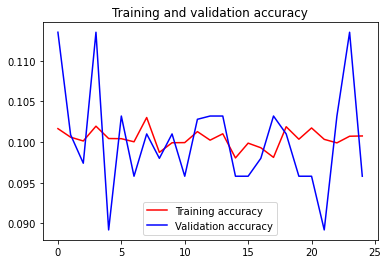

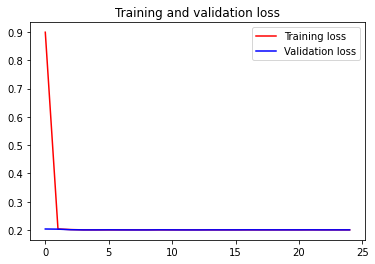

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


## Tune penalty parameter

### 0.5

In [ ]:
svm_c = 0.5
l2 = tf.keras.regularizers.L2(l2=svm_c)

In [ ]:
# Model
cnn2 = Sequential()
cnn2.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn2.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn2.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn2.add(Flatten())
cnn2.add(Dense(1024, activation='relu'))

cnn2.add(Dropout(rate=0.5))

cnn2.add(Dense(10, kernel_regularizer=l2))   # No activation function; instead use L2 regularization

In [ ]:
opt = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999)

In [ ]:
# SVM is L2 regularized hinge loss
cnn2.compile(optimizer=opt, loss = tf.keras.losses.Hinge(), metrics=['accuracy'])

In [ ]:
cnn2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 19, 19, 64)        51264     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 18, 18, 64)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 20736)             0         
                                                                 
 dense_20 (Dense)            (None, 1024)            

In [ ]:
history = cnn2.fit(x_train_norm, y_train_cnn,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_norm, y_test_cnn))

Epoch 1/25
469/469 [==============================] - 8s 15ms/step - loss: 0.6148 - accuracy: 0.9418 - val_loss: 0.0338 - val_accuracy: 0.9755
Epoch 2/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0304 - accuracy: 0.9783 - val_loss: 0.0222 - val_accuracy: 0.9855
Epoch 3/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0283 - accuracy: 0.9830 - val_loss: 0.0224 - val_accuracy: 0.9867
Epoch 4/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0273 - accuracy: 0.9847 - val_loss: 0.0218 - val_accuracy: 0.9868
Epoch 5/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0260 - accuracy: 0.9869 - val_loss: 0.0274 - val_accuracy: 0.9891
Epoch 6/25
469/469 [==============================] - 7s 16ms/step - loss: 0.0250 - accuracy: 0.9880 - val_loss: 0.0211 - val_accuracy: 0.9904
Epoch 7/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0237 - accuracy: 0.9899 - val_loss: 0.0186 - val_accuracy: 0.9899

In [ ]:
score = cnn2.evaluate(x_test_norm, y_test_cnn, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.019477887079119682
Test accuracy: 0.9947999715805054


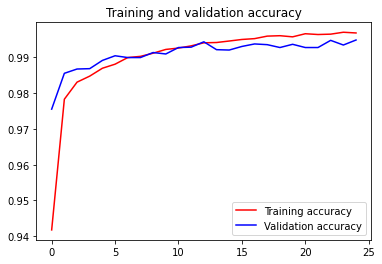

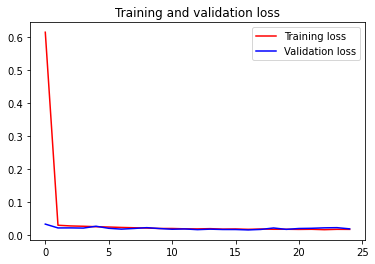

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


### 0.1

In [ ]:
svm_c = 0.1
l2 = tf.keras.regularizers.L2(l2=svm_c)

In [ ]:
# Model
cnn2 = Sequential()
cnn2.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn2.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn2.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn2.add(Flatten())
cnn2.add(Dense(1024, activation='relu'))

cnn2.add(Dropout(rate=0.5))

cnn2.add(Dense(10, kernel_regularizer=l2))   # No activation function; instead use L2 regularization

In [ ]:
opt = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999)

In [ ]:
# SVM is L2 regularized hinge loss
cnn2.compile(optimizer=opt, loss = tf.keras.losses.Hinge(), metrics=['accuracy'])

In [ ]:
cnn2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 19, 19, 64)        51264     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 18, 18, 64)       0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 20736)             0         
                                                                 
 dense_22 (Dense)            (None, 1024)            

In [ ]:
history = cnn2.fit(x_train_norm, y_train_cnn,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_norm, y_test_cnn))

Epoch 1/25
469/469 [==============================] - 8s 16ms/step - loss: 0.2389 - accuracy: 0.9441 - val_loss: 0.0198 - val_accuracy: 0.9820
Epoch 2/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0214 - accuracy: 0.9811 - val_loss: 0.0166 - val_accuracy: 0.9838
Epoch 3/25
469/469 [==============================] - 7s 16ms/step - loss: 0.0181 - accuracy: 0.9844 - val_loss: 0.0167 - val_accuracy: 0.9866
Epoch 4/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0163 - accuracy: 0.9877 - val_loss: 0.0145 - val_accuracy: 0.9899
Epoch 5/25
469/469 [==============================] - 7s 16ms/step - loss: 0.0154 - accuracy: 0.9896 - val_loss: 0.0137 - val_accuracy: 0.9896
Epoch 6/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0149 - accuracy: 0.9902 - val_loss: 0.0129 - val_accuracy: 0.9919
Epoch 7/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0143 - accuracy: 0.9916 - val_loss: 0.0146 - val_accuracy: 0.9884

In [ ]:
score = cnn2.evaluate(x_test_norm, y_test_cnn, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.012114079669117928
Test accuracy: 0.9933000206947327


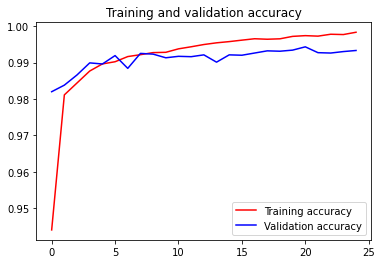

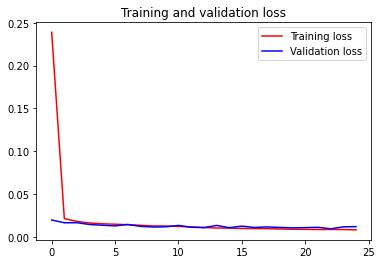

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


### 0.01

In [ ]:
svm_c = 0.01
l2 = tf.keras.regularizers.L2(l2=svm_c)

In [ ]:
# Model
cnn2 = Sequential()
cnn2.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

cnn2.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

cnn2.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

cnn2.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

cnn2.add(Flatten())
cnn2.add(Dense(1024, activation='relu'))

cnn2.add(Dropout(rate=0.5))

cnn2.add(Dense(10, kernel_regularizer=l2))   # No activation function; instead use L2 regularization

In [ ]:
opt = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999)

In [ ]:
# SVM is L2 regularized hinge loss
cnn2.compile(optimizer=opt, loss = tf.keras.losses.Hinge(), metrics=['accuracy'])

In [ ]:
cnn2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 19, 19, 64)        51264     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 18, 18, 64)       0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 20736)             0         
                                                                 
 dense_24 (Dense)            (None, 1024)            

In [ ]:
history = cnn2.fit(x_train_norm, y_train_cnn,
                  batch_size=128,
                  epochs=25,
                  validation_data=(x_test_norm, y_test_cnn))

Epoch 1/25
469/469 [==============================] - 8s 16ms/step - loss: 0.1285 - accuracy: 0.9472 - val_loss: 0.0306 - val_accuracy: 0.9854
Epoch 2/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0218 - accuracy: 0.9845 - val_loss: 0.0127 - val_accuracy: 0.9877
Epoch 3/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0130 - accuracy: 0.9877 - val_loss: 0.0111 - val_accuracy: 0.9885
Epoch 4/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0114 - accuracy: 0.9886 - val_loss: 0.0091 - val_accuracy: 0.9912
Epoch 5/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0101 - accuracy: 0.9906 - val_loss: 0.0086 - val_accuracy: 0.9916
Epoch 6/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0095 - accuracy: 0.9918 - val_loss: 0.0092 - val_accuracy: 0.9906
Epoch 7/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0089 - accuracy: 0.9928 - val_loss: 0.0083 - val_accuracy: 0.9922

In [ ]:
score = cnn2.evaluate(x_test_norm, y_test_cnn, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.007883837446570396
Test accuracy: 0.9927999973297119


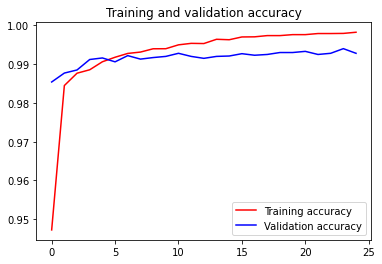

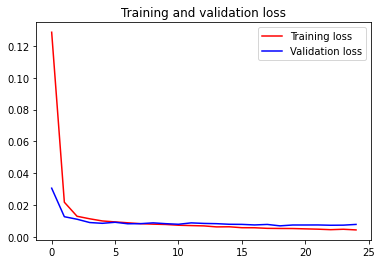

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


# Model with Data Augmentattion

In [ ]:
# datagen = ImageDataGenerator(
#         rotation_range = 8,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.1, # Randomly zoom image 
#         shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
#         width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
#         vertical_flip=True)  # randomly flip images

# datagen.fit(x_train_cnn)

In [ ]:
# # Model
# cnn3 = Sequential()
# cnn3.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal", input_shape=(28, 28, 1)))

# cnn3.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

# cnn3.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1) ,activation='relu',kernel_initializer="he_normal"))

# cnn3.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))

# cnn3.add(Flatten())
# cnn3.add(Dense(1024, activation='relu'))

# cnn3.add(Dropout(rate=0.5))

# cnn3.add(Dense(10, activation='softmax'))

In [ ]:
# opt = Adam(lr= 1e-3, beta_1=0.9, beta_2=0.999)

In [ ]:
# cnn3.compile(optimizer=opt, loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
# history = cnn3.fit(x_train_norm, y_train_cnn,
#                   batch_size=128,
#                   epochs=25,
#                   validation_data=(x_test_norm, y_test_cnn))

In [ ]:
# score = cnn3.evaluate(x_test_norm, y_test_cnn, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

In [ ]:
# accuracy = history.history['accuracy']
# val_accuracy = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(len(accuracy))

# plt.plot(epochs, accuracy, 'r', label='Training accuracy')
# plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend()
# plt.figure()

# plt.plot(epochs, loss, 'r', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()
# plt.show()
